<a href="https://colab.research.google.com/github/cufuentes/CodingDojo/blob/main/matriz_confusion_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
#load df
filename = "/content/cancer.csv"
df = pd.read_csv(filename)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#transformamos diagnosis en number
print(df["diagnosis"].value_counts())
df["diagnosis"].replace({"B":0,"M":1},inplace=True)
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64


diagnosis
0    357
1    212
Name: count, dtype: int64

In [8]:
#definimos conjuntos de train y test
X=df.drop(columns="diagnosis")
y=df["diagnosis"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [9]:
#instanciamos los modelos
dec_tree=DecisionTreeClassifier(random_state=42,max_depth=2)
bag_classifer = BaggingClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state =42)

In [10]:
#entrenamos los modelos
dec_tree.fit(X_train,y_train)
bag_classifer.fit(X_train,y_train)
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [15]:
#Evaluamos el tree normal
tree_train_score = dec_tree.score(X_train,y_train)
tree_test_score = dec_tree.score(X_test,y_test)
tree_prediction = dec_tree.predict(X_test)
print(tree_train_score)
print(tree_test_score)

0.9460093896713615
0.916083916083916


In [21]:
#evaluamos el bagging
bag_train_score = bag_classifer.score(X_train,y_train)
bag_test_score = bag_classifer.score(X_test,y_test)
bag_predict = bag_classifer.predict(X_test)
print(bag_train_score)
print(bag_test_score)

0.9929577464788732
0.951048951048951


In [22]:
#evaluamos el random forest
forest_train_score = random_forest.score(X_train,y_train)
forest_test_score = random_forest.score(X_test,y_test)
forest_prediction = random_forest.predict(X_test)
print(forest_train_score)
print(forest_test_score)

1.0
0.972027972027972


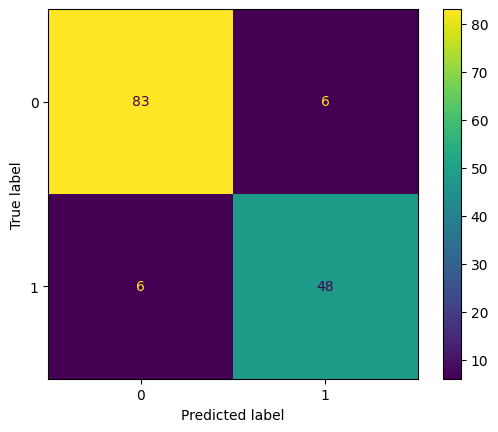

In [18]:
#creamos la matriz de confusion para arbol normal
cm_tree = confusion_matrix(y_test,tree_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp.plot()

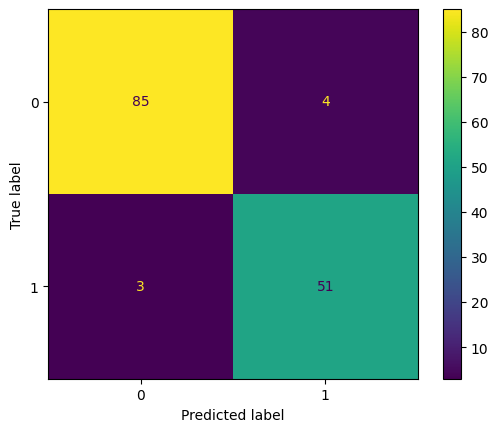

In [24]:
#creamos la matriz de confusion para bagged trees
cm_tree = confusion_matrix(y_test,bag_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp.plot()

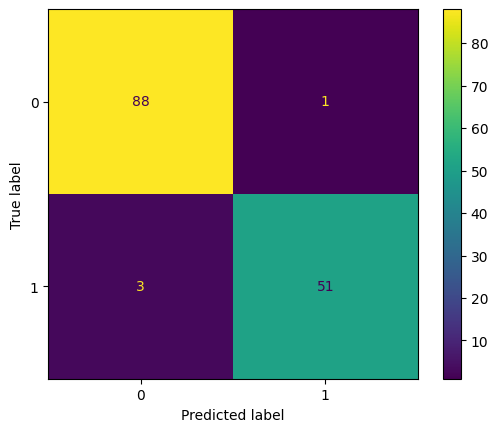

In [26]:
#creamos la matriz de confusion para random forest
cm_tree = confusion_matrix(y_test,forest_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp.plot()

2. Se considera positiva la clase M o maligna

3. Con random forest tenemos 3 falsos negativos y 1 falso positivo. Es el mejor de todos los clasificadores.


5. Según esta clasificación de positivos y negativos, son más problematicos los falsos negativos, ya que son casos donde efectivamente exista cancer y no se consideran para tratarse.